In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils1

#### Preparing the NOn-Linear Data


In [2]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

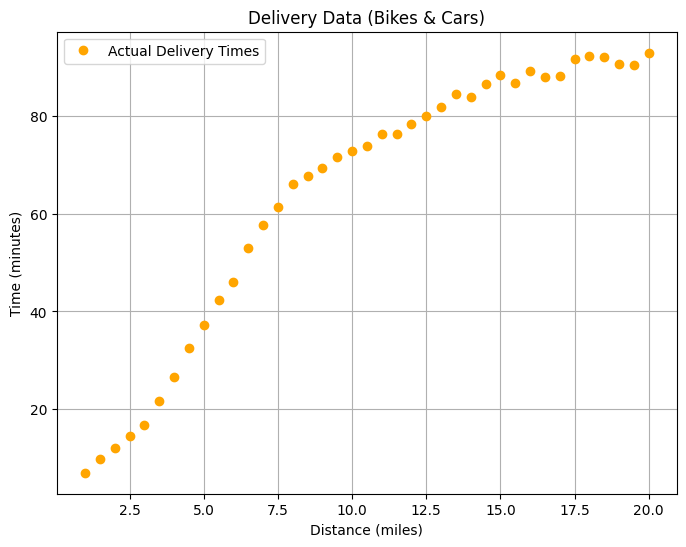

In [3]:
helper_utils1.plot_data(distances, times)

In [15]:
# Calculate the mean and standard deviation fpor the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and standard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distance
distances_norm = (distances - distances_mean) / distances_std

# Apply standardidzation to the times
times_norm = (times - times_mean) / times_std

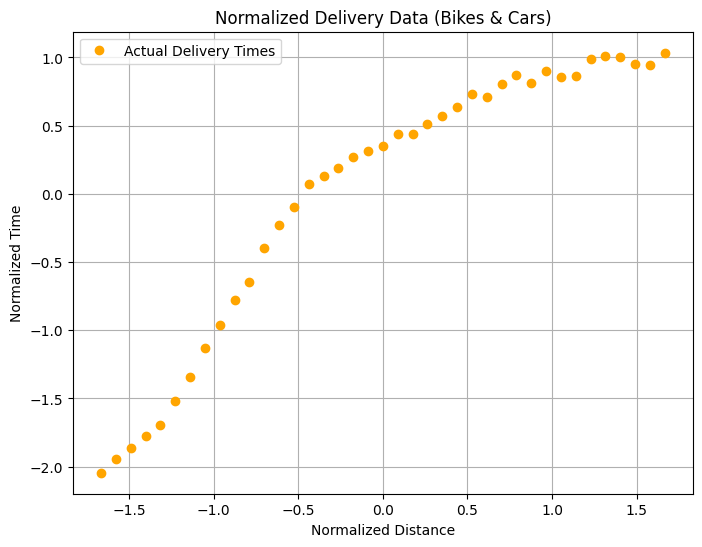

In [5]:
helper_utils1.plot_data(distances_norm, times_norm, normalize=True)

### Building the Non-Linear Model

In [7]:
# This line ensures that the results are reproducable and consistent every time
torch.manual_seed(27)

model = nn.Sequential(
  nn.Linear(1, 3),
  nn.ReLU(),
  nn.Linear(3, 1)
)

### Training

In [8]:
# Defining the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

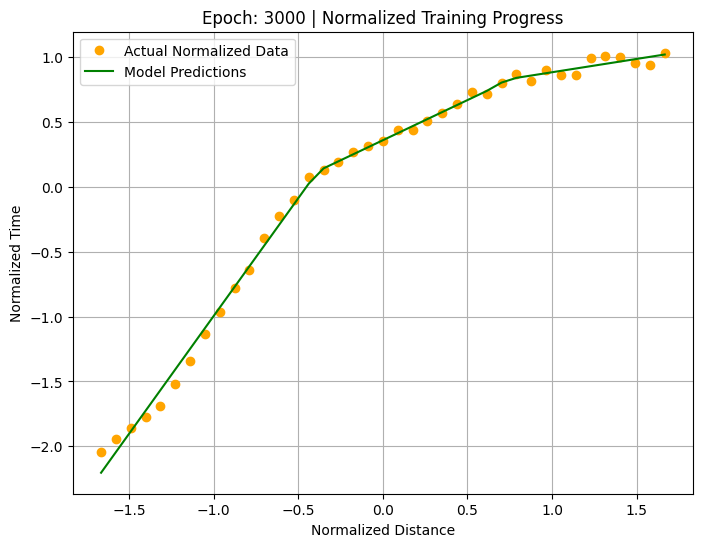


Training Complete.

Final Loss: 0.002955933567136526


In [11]:
# Training loop
for epoch in range(3000):
  # Reset the optimizer's gradients
  optimizer.zero_grad()
  # Make predictions (forward pass)
  outputs = model(distances_norm)
  # Calculate the loss
  loss = loss_function(outputs, times_norm)
  # Calculate adjustments(backward pass)
  loss.backward()
  # Update the model's parameters
  optimizer.step()

  # Create a live plot every 50 epochs
  if (epoch + 1) % 50 == 0:
    helper_utils1.plot_training_progress(
      epoch=epoch,
      loss=loss,
      model=model,
      distances_norm=distances_norm,
      times_norm=times_norm
    )

print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")

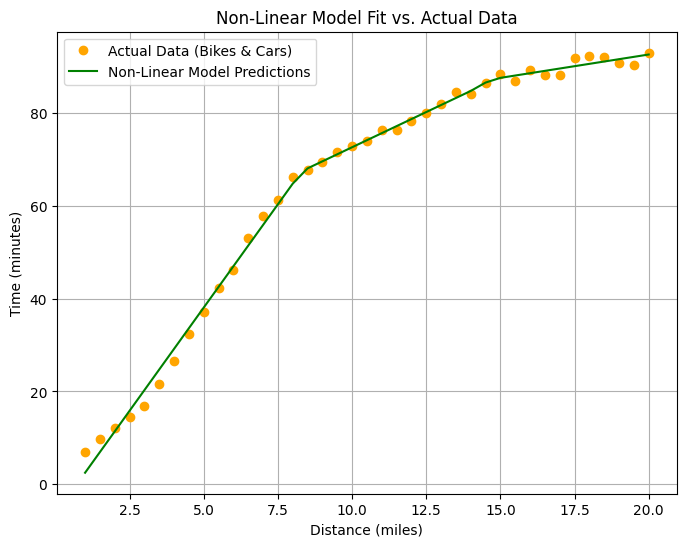

In [13]:
helper_utils1.plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

In [14]:
distance_to_predict = 5.1


In [16]:
# torch.no_grad() context manager for efficient prediction
with torch.no_grad():
  distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
  new_distance_norm = (distance_tensor - distances_mean) / distances_std

  # Get the normalized prediction from the model
  predicted_time_norm = model(new_distance_norm)

  # De-normalize the output to get the actual time in minutes
  predicted_time_actual = (predicted_time_norm * times_std) + times_mean

  # Decision making Logic
  print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")

  # First, check if the delivery is possible within the 45-minute timeframe
  if predicted_time_actual.item() > 45:
    print("\nDecision: DO NOT promise the delivery in under 45 minutes")
  else:
    # If it is possible, then determine the vehicle based on the distance
    if distance_to_predict <= 3:
      print(f"\nDecison: Yes, delivery is possible since the distance is {distance_to_predict} miles (<= 3 miles), use a bike")
    else:
      print(f"\nDecision: Yes delivery is possible. since the distance is {distance_to_predict} miles (> 3 miles), use a car")



Prediction for a 5.1-mile delivery: 39.0 minutes

Decision: Yes delivery is possible. since the distance is 5.1 miles (> 3 miles), use a car
